In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [141]:
# пропущенные значения (часть 1)

In [142]:
# выявление пропусков

In [143]:
titanic = pd.read_csv('train.csv')

In [144]:
# базовые методы
# метод INFO

In [145]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [146]:
titanic.Age.astype('int')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [147]:
# методы isna / sum

In [148]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [149]:
# процент пропущенных значений

In [150]:
(titanic.isna().sum()/len(titanic)).round(4)*100

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [151]:
# библиотека missingno

In [152]:
import missingno as msno

In [153]:
sns.set()

<Axes: >

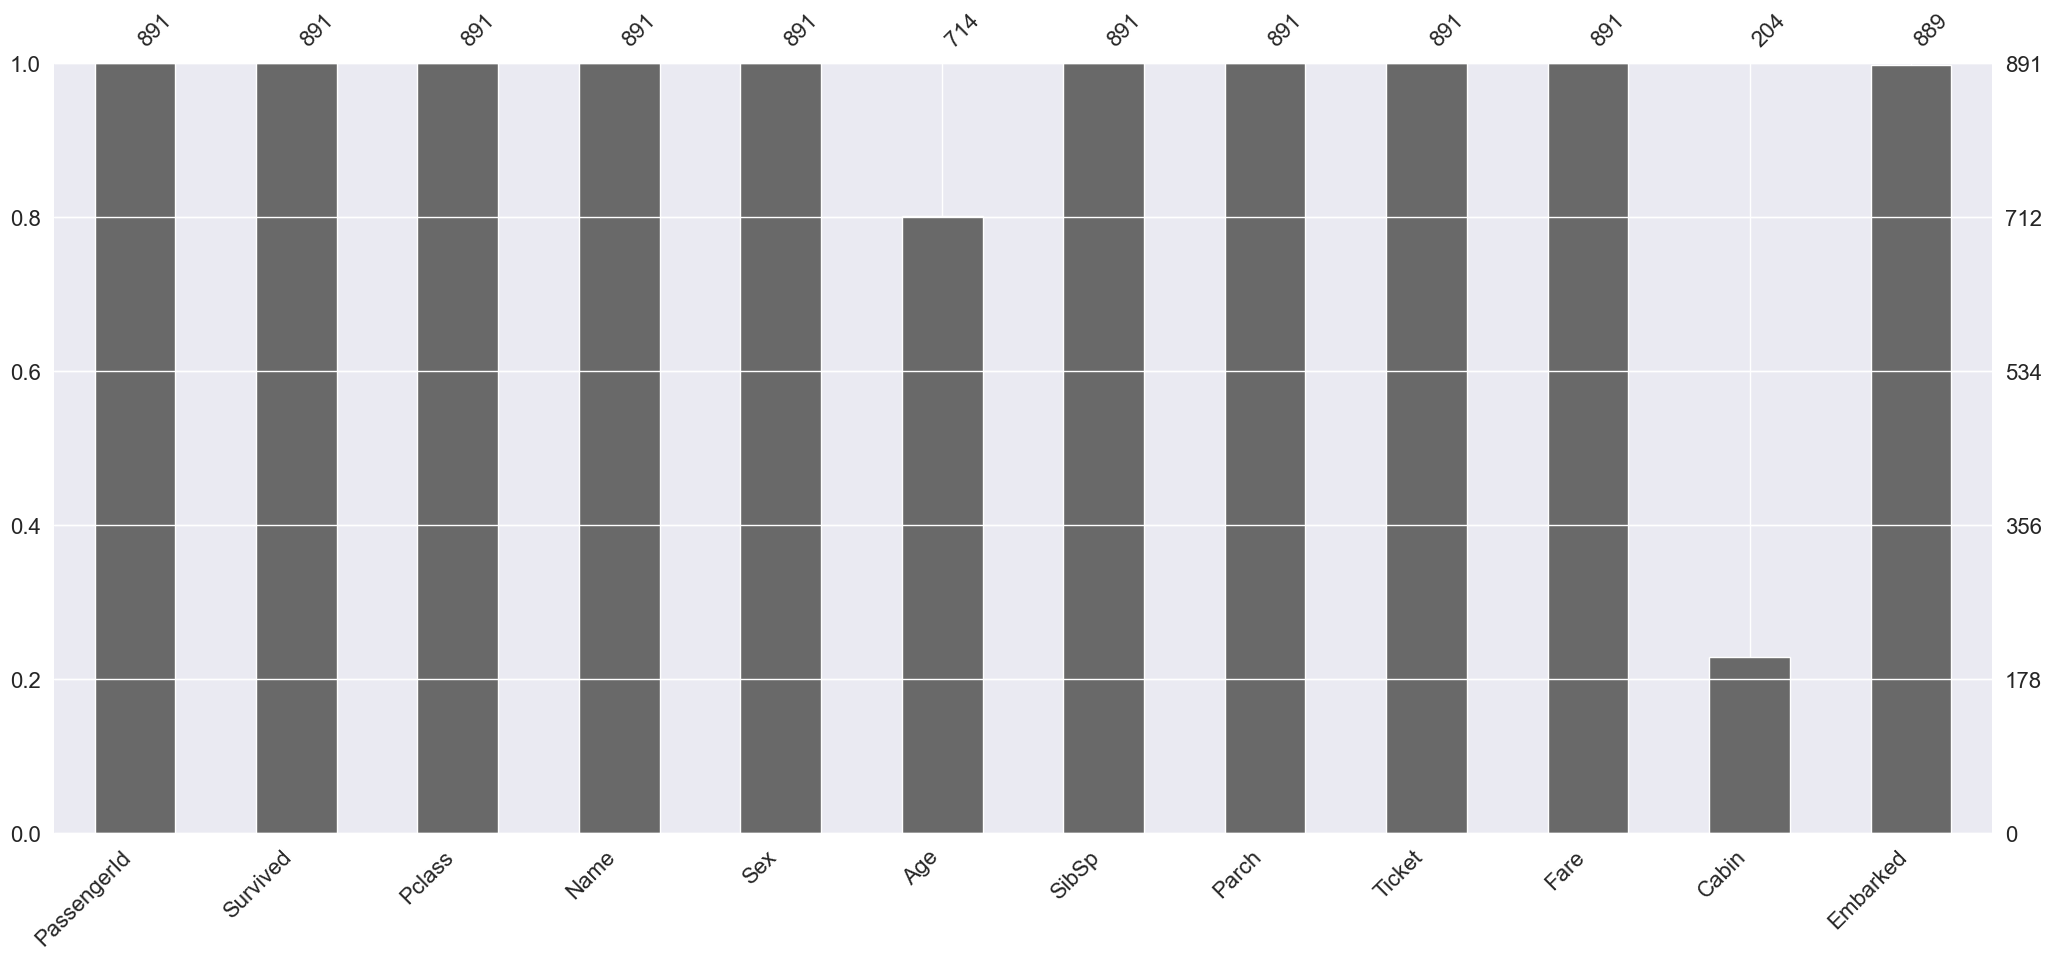

In [154]:
msno.bar(titanic)

<Axes: >

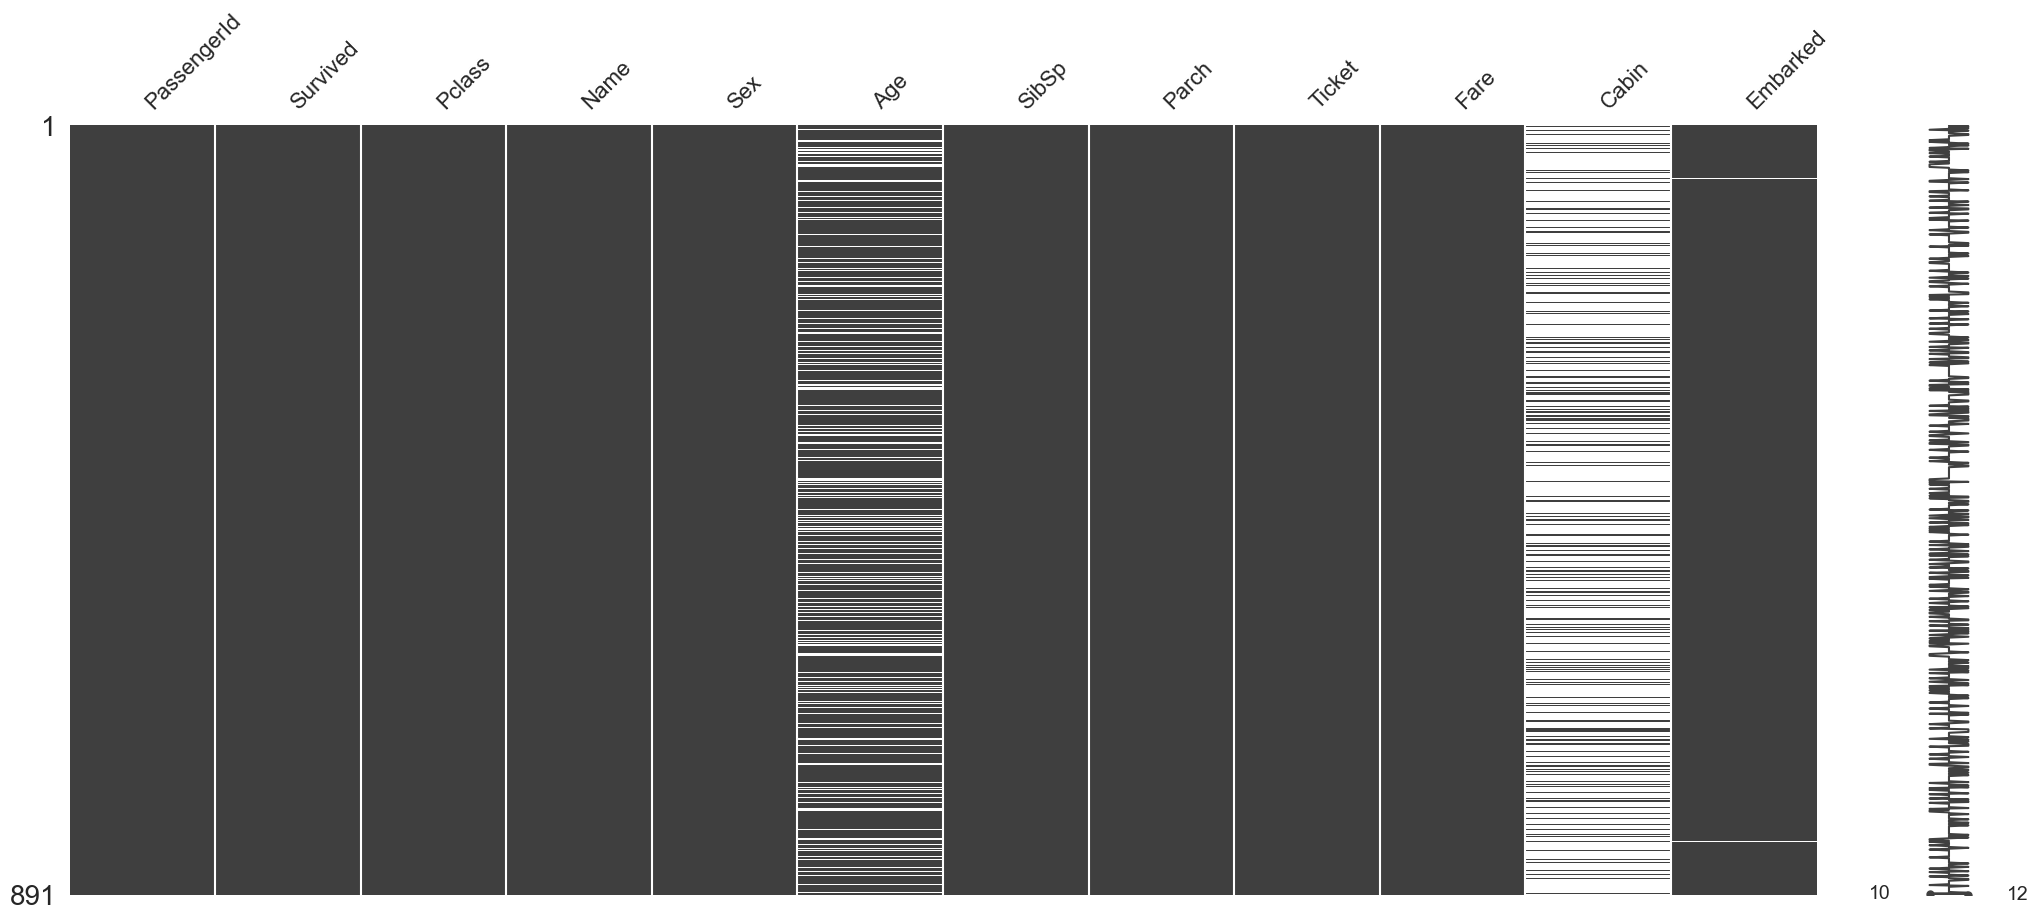

In [155]:
msno.matrix(titanic)

In [156]:
# Матрица корреляции пропущенных значений

In [157]:
titanic[['Age','Cabin','Embarked']].isnull().corr()

,Age,Cabin,Embarked
Age,1.000000,0.144111,-0.023616
Cabin,0.144111,1.000000,-0.087042
Embarked,-0.023616,-0.087042,1.000000


In [158]:
df = titanic.iloc[:, [i for i, n in enumerate(np.var(titanic.isnull(), axis = 'rows')) if n > 0]]
df.isnull().corr()

,Age,Cabin,Embarked
Age,1.000000,0.144111,-0.023616
Cabin,0.144111,1.000000,-0.087042
Embarked,-0.023616,-0.087042,1.000000


<Axes: >

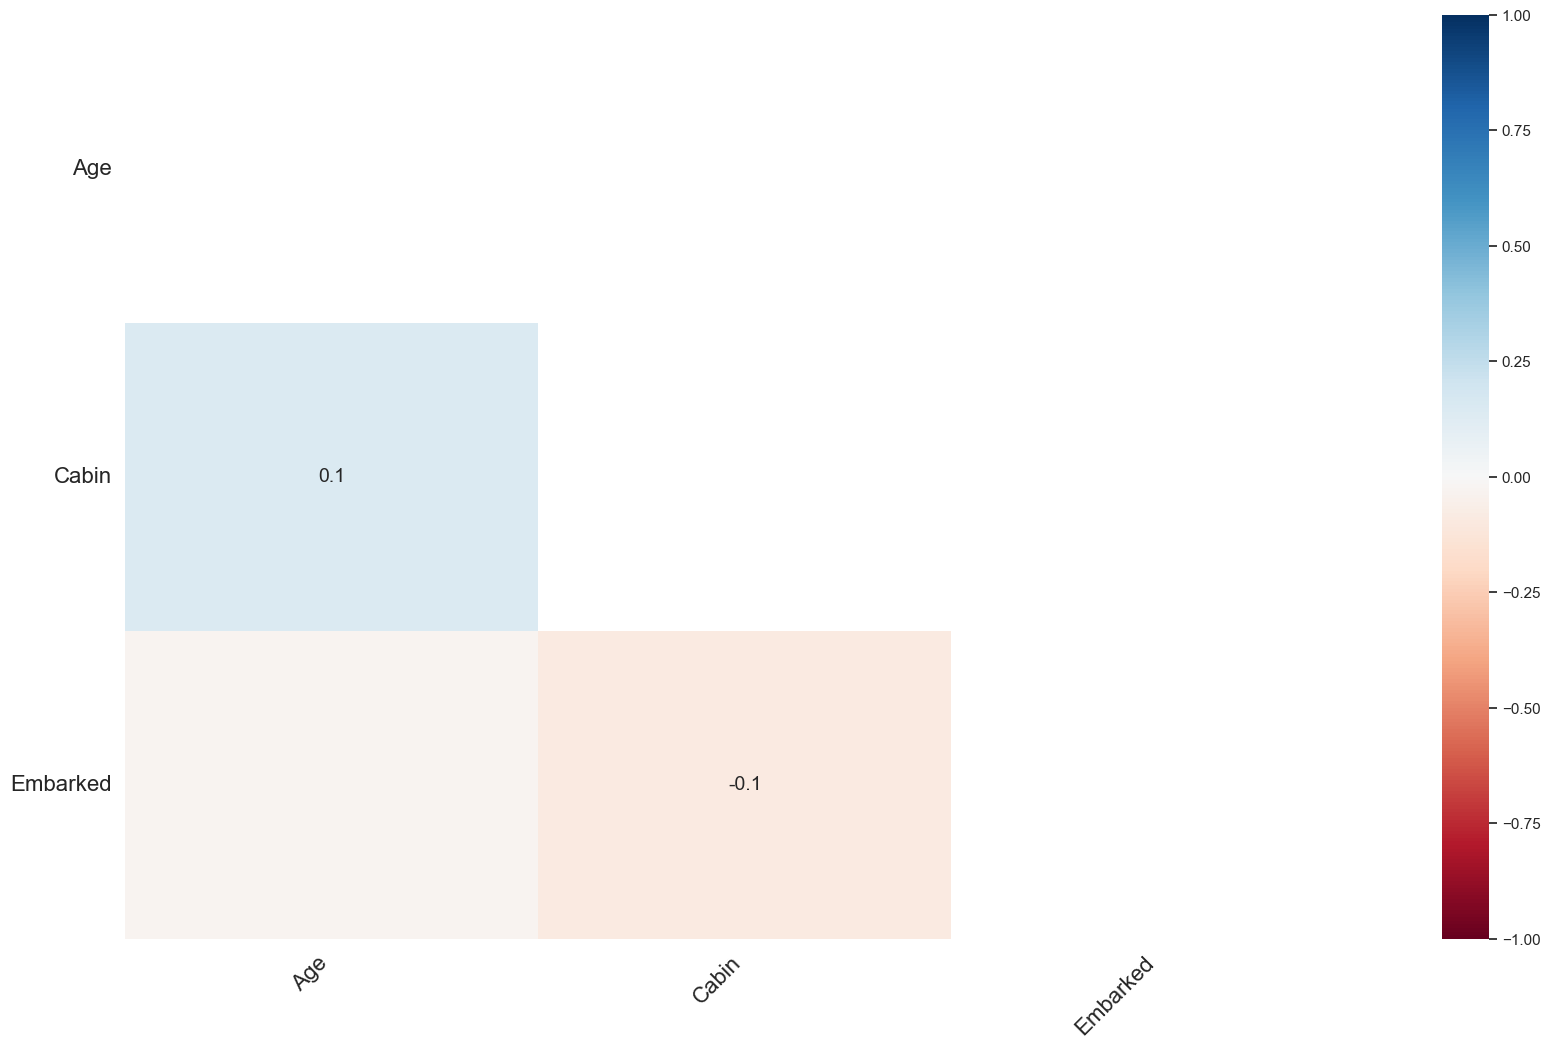

In [159]:
msno.heatmap(titanic)

In [160]:
# стратегии работы с пропусками

In [161]:
# удаление пропусков

In [162]:
# удаление строк

In [163]:
# удаление строк обозначим через axis = 'index'
# subset = ['Embarked'] говорит о том, что мы ищем пропуски только в столбце Embarked
titanic.dropna(axis = 'index', subset = ['Embarked'], inplace = True)

In [164]:
# убедимся, что в Embarked действительно не осталось пропусков
titanic.Embarked.isna().sum()

0

In [165]:
# удаление столбцов

In [166]:
# передадим в параметр columns тот столбец, который хотим удалить
titanic.drop(columns = ['Cabin'], inplace = True)

In [167]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [168]:
sex_g = titanic.groupby('Sex').count()
sex_g

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
Sex,,,,,,,,,,
female,312,312,312,312,259,312,312,312,312,312
male,577,577,577,577,453,577,577,577,577,577


In [206]:
# сравним количество пассажиров в столбце Age и столбце PassengerId
sex_g['PassengerId'].sum(), sex_g['Age'].sum()

(889, 712)

In [207]:
# метод .mean() игнорирует пропуски и не выдает ошибки
titanic['Age'].mean()

29.64209269662921

In [208]:
# то же можно сказать про метод .corr()
titanic[['Age', 'Fare']].corr()

,Age,Fare
Age,1.000000,0.093143
Fare,0.093143,1.000000


In [209]:
# заполнение пропусков

In [210]:
# возьмем лишь некоторые из столбцов
titanic = titanic[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked']]
 
# закодируем столбец Sex с помощью числовых значений
map_dict = {'male' : 0, 'female' : 1}
titanic['Sex'] = titanic['Sex'].map(map_dict)
 
# посмотрим на результат
titanic.head()

,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,3,NaN,1,0,7.2500,22.0,S
1,1,NaN,1,0,71.2833,38.0,C
2,3,NaN,0,0,7.9250,26.0,S
3,1,NaN,1,0,53.1000,35.0,S
4,3,NaN,0,0,8.0500,35.0,S


In [211]:
# одномерные методы

In [212]:
# вначале сделаем копию датасета
fillna_const = titanic.copy()
 
# заполним пропуски в столбце Age нулями, передав методу .fillna() словарь,
# где ключами будут названия столбцов, а значениями - константы для заполнения пропусков
fillna_const.fillna({'Age' : 0}, inplace = True)

In [213]:
titanic.Age.median(), fillna_const.Age.median()

(28.0, 24.0)

In [214]:
# найдем пассажиров с неизвестным портом посадки
# для этого создадим маску по столбцу Embarked и применим ее к исходным данным
missing_embarked = pd.read_csv('train.csv')
missing_embarked[missing_embarked.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [215]:
# метод .fillna() можно применить к одному столбцу
# два пропущенных значения в столбце Embarked заполним буквой S (Southampton)
fillna_const.Embarked.fillna('S', inplace = True)

C:\Users\Alex\AppData\Local\Temp\ipykernel_10760\666460195.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fillna_const.Embarked.fillna('S', inplace = True)


In [216]:
# убедимся, что в столбцах Age и Embarked не осталось пропущенных значений
fillna_const[['Age', 'Embarked']].isna().sum()

Age         0
Embarked    0
dtype: int64

In [217]:
# сделаем копию датасета
const_imputer = titanic.copy()
 
# импортируем класс SimpleImputer из модуля impute библиотеки sklearn
from sklearn.impute import SimpleImputer
 
# создадим объект этого класса, указав,
# что мы будем заполнять константой strategy = 'constant', а именно нулем fill_value = 0
imp_const = SimpleImputer(strategy = 'constant', fill_value = 0)
 
# и обучим модель на столбце Age
# мы используем двойные скобки, потому что метод .fit() на вход принимает двумерный массив
imp_const.fit(const_imputer[['Age']])

SimpleImputer(fill_value=0, strategy='constant')

In [218]:
# также используем двойные скобки с методом .transform()
const_imputer['Age'] = imp_const.transform(const_imputer[['Age']])
 
# убедимся, что пропусков не осталось и посчитаем количество нулевых значений
const_imputer.Age.isna().sum(), (const_imputer['Age'] == 0).sum()

(0, 177)

In [219]:
# удалим его
const_imputer.drop(columns = ['Embarked'], inplace = True)
 
# и посмотрим на размер получившегося датафрейма
const_imputer.shape

(889, 6)

In [220]:
# посмотрим на результат
const_imputer.head(3)

,Pclass,Sex,SibSp,Parch,Fare,Age
0,3,NaN,1,0,7.2500,22.0
1,1,NaN,1,0,71.2833,38.0
2,3,NaN,0,0,7.9250,26.0


In [221]:
# Заполнение средним арифметическим или медианой

In [222]:
# сделаем копию датафрейма
fillna_median = titanic.copy()
 
# заполним пропуски в столбце Age медианным значением возраста,
# можно заполнить и средним арифметическим через метод .mean()
fillna_median.Age.fillna(fillna_median.Age.median(), inplace = True)
 
# убедимся, что пропусков не осталось
fillna_median.Age.isna().sum()

C:\Users\Alex\AppData\Local\Temp\ipykernel_10760\2470732575.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fillna_median.Age.fillna(fillna_median.Age.median(), inplace = True)


0

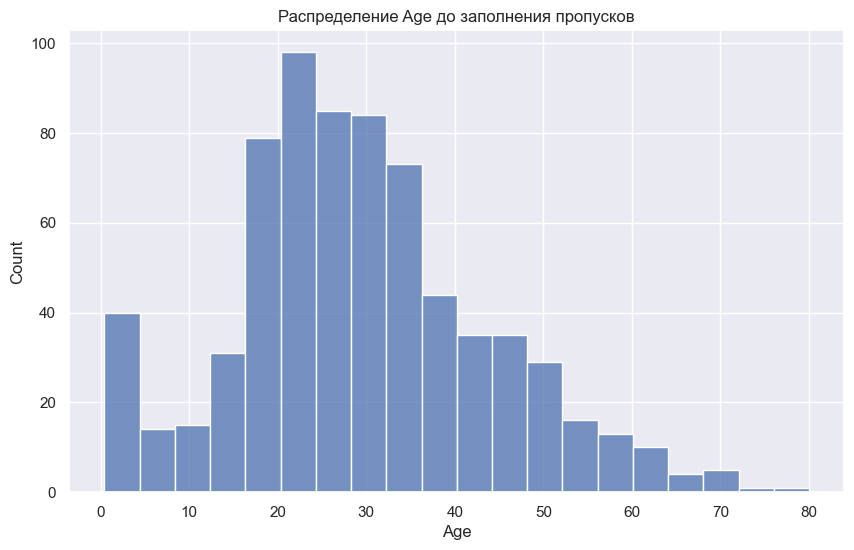

In [223]:
# изменим размер последующих графиков
sns.set(rc = {'figure.figsize' : (10, 6)})
 
# скопируем датафрейм
median_imputer = titanic.copy()
 
# посмотрим на распределение возраста до заполнения пропусков
sns.histplot(median_imputer['Age'], bins = 20)
plt.title('Распределение Age до заполнения пропусков');

In [224]:
median_imputer['Age'].mean().round(1), median_imputer['Age'].median()

(29.6, 28.0)

In [225]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
# (для заполнения средним арифметическим используйте strategy = 'mean')
imp_median = SimpleImputer(strategy = 'median')
 
# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['Age'] = imp_median.fit_transform(median_imputer[['Age']])
 
# убедимся, что пропущенных значений не осталось
median_imputer.Age.isna().sum()

0

Text(0.5, 1.0, 'Распределение Age после заполнения медианой')

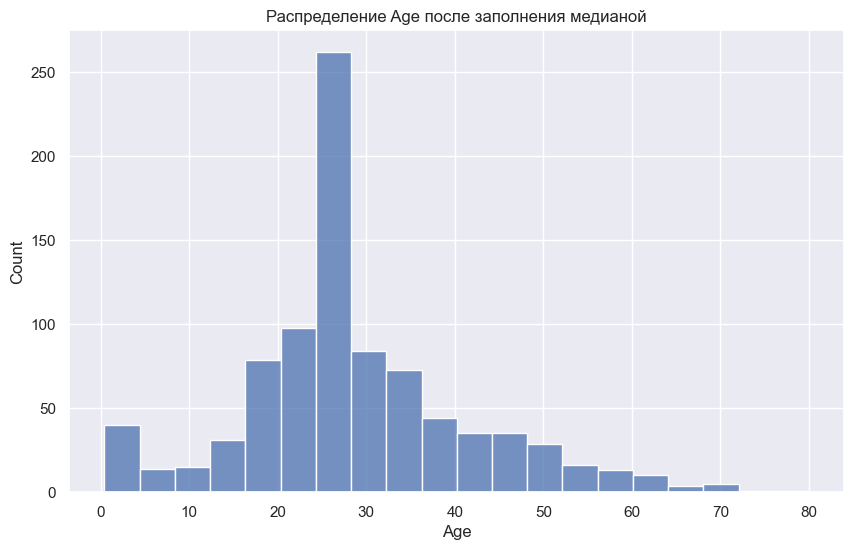

In [226]:
# посмотрим на распределение после заполнения пропусков
sns.histplot(median_imputer['Age'], bins = 20)
plt.title('Распределение Age после заполнения медианой')

In [227]:
# посмотрим на метрики после заполнения медианой
median_imputer['Age'].mean().round(1), median_imputer['Age'].median()

(29.3, 28.0)

In [228]:
# столбец Embarked нам опять же не понадобится
median_imputer.drop(columns = ['Embarked'], inplace = True)
 
# посмотрим на размеры получившегося датафрейма
median_imputer.shape

(889, 6)

In [229]:
# Заполнение внутригрупповым значением

In [230]:
# скопируем датафрейм
median_imputer_bins = titanic.copy()

In [231]:
# сгруппируем пассажиров по полу и классу каюты
Age_bins = median_imputer_bins.groupby(['Sex', 'Pclass'])
 
# найдем медианный возраст с учетом получившихся групп
Age_bins.Age.median()

Series([], Name: Age, dtype: float64)

In [232]:
# объект SeriesGroupBy находится в переменной Age_bins.Age,
# применим к нему lambda-функцию через метод .apply()
median_imputer_bins.Age = Age_bins.Age.apply(lambda x: x.fillna(x.median()))

C:\Users\Alex\AppData\Local\Temp\ipykernel_10760\3828705926.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  median_imputer_bins.Age = Age_bins.Age.apply(lambda x: x.fillna(x.median()))


In [233]:
# проверим пропуски в столбце Age
median_imputer_bins.Age.isna().sum()

0

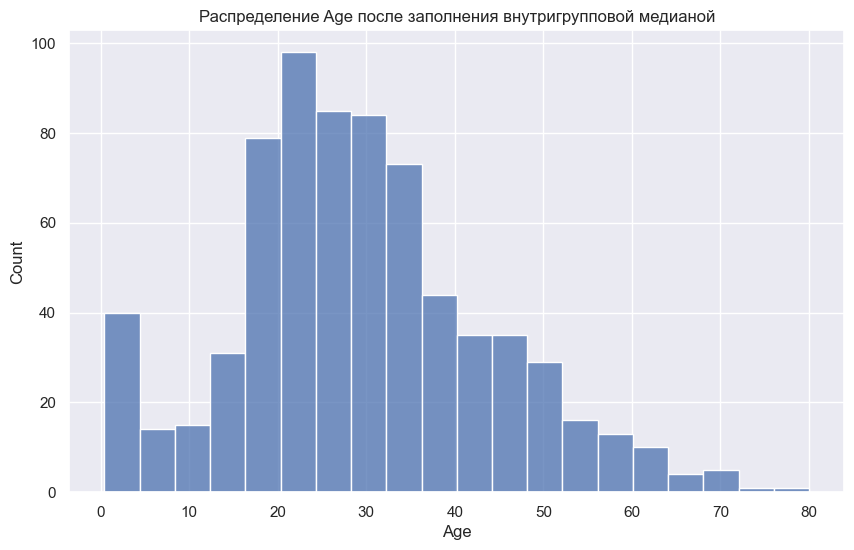

In [234]:
sns.histplot(median_imputer_bins['Age'], bins = 20)
plt.title('Распределение Age после заполнения внутригрупповой медианой');

In [235]:
# столбец Embarked нам не понадобится
median_imputer_bins.drop(columns = ['Embarked'], inplace = True)
 
# посмотрим на размеры получившегося датафрейма
median_imputer_bins.shape

(889, 6)

In [236]:
# Заполнение наиболее частотным значением

In [237]:
titanic.head()

,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,3,NaN,1,0,7.2500,22.0,S
1,1,NaN,1,0,71.2833,38.0,C
2,3,NaN,0,0,7.9250,26.0,S
3,1,NaN,1,0,53.1000,35.0,S
4,3,NaN,0,0,8.0500,35.0,S


In [238]:
# скопируем датафрейм
titanic_mode = titanic.copy()
 
# посмотрим на распределение пассажиров по порту посадки до заполнения пропусков
titanic_mode.groupby('Embarked')['Survived'].count()

KeyError: 'Column not found: Survived'

In [239]:
# создадим объект класса SimpleImputer с параметром strategy = 'most_frequent'
imp_most_freq = SimpleImputer(strategy = 'most_frequent')
 
# применим метод .fit_transform() к столбцу Embarked
titanic_mode['Embarked'] = imp_most_freq.fit_transform(titanic_mode[['Embarked']])
 
# убедимся, что пропусков не осталось
titanic_mode.Embarked.isna().sum()


ValueError: 2

In [240]:
# количество пассажиров в категории S должно увеличиться на два
titanic_mode.groupby('Embarked')['Survived'].count()

KeyError: 'Column not found: Survived'

In [241]:
titanic.Embarked.value_counts().index[0]

'S'

In [242]:
# для работы с последующими методами столбец Embarked нам уже не нужен
titanic.drop(columns = ['Embarked'], inplace = True)

In [243]:
# пропущенные значения (часть 2)

In [244]:
# многомерные методы

In [245]:
tit = titanic.drop(columns=['PassengerId','Survived','Name','Ticket','Cabin','Embarked'], axis = 1)
tit['Sex'] = tit['Sex'].replace({'male': 0, 'female':1})

KeyError: "['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'] not found in axis"

In [247]:
lr = tit.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# применяем метод .fit_transform() и сразу помещаем результат в датафрейм
lr = pd.DataFrame(scaler.fit_transform(lr), columns = lr.columns)
 
# посмотрим на результат
lr.head(3)


,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.827377,-0.737695,-0.530377,0.432793,-0.473674,-0.502445
1,-1.566107,1.355574,0.571831,0.432793,-0.473674,0.786845
2,0.827377,1.355574,-0.254825,-0.474545,-0.473674,-0.488854


In [248]:
# создадим маску из пустых значений в столбце Age с помощью метода .isnull()
test = lr[lr['Age'].isnull()].copy()
test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare
5,0.827377,-0.737695,NaN,-0.474545,-0.473674,-0.478116
17,-0.369365,-0.737695,NaN,-0.474545,-0.473674,-0.386671
19,0.827377,1.355574,NaN,-0.474545,-0.473674,-0.502949


In [249]:
test.shape

(177, 6)

In [250]:
train = lr.dropna().copy()
train.shape

(714, 6)

In [251]:
len(train + test)

891

In [252]:
y_train = train['Age']
# также не забудем удалить столбец Age из датафрейма признаков
X_train = train.drop('Age', axis = 1)
# в test столбец Age не нужен в принципе
X_test = test.drop('Age', axis = 1)

In [253]:
X_train.head(3)

,Pclass,Sex,SibSp,Parch,Fare
0,0.827377,-0.737695,0.432793,-0.473674,-0.502445
1,-1.566107,1.355574,0.432793,-0.473674,0.786845
2,0.827377,1.355574,-0.474545,-0.473674,-0.488854


In [254]:
y_train.head(3)

0   -0.530377
1    0.571831
2   -0.254825
Name: Age, dtype: float64

In [255]:
X_test.head()

,Pclass,Sex,SibSp,Parch,Fare
5,0.827377,-0.737695,-0.474545,-0.473674,-0.478116
17,-0.369365,-0.737695,-0.474545,-0.473674,-0.386671
19,0.827377,1.355574,-0.474545,-0.473674,-0.502949
26,0.827377,-0.737695,-0.474545,-0.473674,-0.502949
28,0.827377,1.355574,-0.474545,-0.473674,-0.489776


In [256]:
#Обучение модели и заполнение пропусков

In [257]:
# импортируем класс LinearRegression
from sklearn.linear_model import LinearRegression
 
# создадим объект этого класса
lr_model = LinearRegression()
 
# обучим модель
lr_model.fit(X_train, y_train)
 
# применим обученную модель к данным, в которых были пропуски в столбце Age
y_pred = lr_model.predict(X_test)
 
# посмотрим на первые три прогнозных значения
y_pred[:3]

array([-0.09740093,  0.37999257, -0.31925429])

In [258]:
# присоединим прогнозные значения возраста к датафрейму test
test['Age'] = y_pred
test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare
5,0.827377,-0.737695,-0.097401,-0.474545,-0.473674,-0.478116
17,-0.369365,-0.737695,0.379993,-0.474545,-0.473674,-0.386671
19,0.827377,1.355574,-0.319254,-0.474545,-0.473674,-0.502949


In [259]:
# еще раз взглянем на датафрейм train
train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.827377,-0.737695,-0.530377,0.432793,-0.473674,-0.502445
1,-1.566107,1.355574,0.571831,0.432793,-0.473674,0.786845
2,0.827377,1.355574,-0.254825,-0.474545,-0.473674,-0.488854


In [260]:
lr = pd.concat([train, test])
lr.head(7)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.827377,-0.737695,-0.530377,0.432793,-0.473674,-0.502445
1,-1.566107,1.355574,0.571831,0.432793,-0.473674,0.786845
2,0.827377,1.355574,-0.254825,-0.474545,-0.473674,-0.488854
3,-1.566107,1.355574,0.365167,0.432793,-0.473674,0.420730
4,0.827377,-0.737695,0.365167,-0.474545,-0.473674,-0.486337
6,-1.566107,-0.737695,1.674039,-0.474545,-0.473674,0.395814
7,0.827377,-0.737695,-1.908136,2.247470,0.767630,-0.224083


In [261]:
lr.shape

(891, 6)

In [262]:
lr.sort_index(inplace=True)
lr.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.827377,-0.737695,-0.530377,0.432793,-0.473674,-0.502445
1,-1.566107,1.355574,0.571831,0.432793,-0.473674,0.786845
2,0.827377,1.355574,-0.254825,-0.474545,-0.473674,-0.488854
3,-1.566107,1.355574,0.365167,0.432793,-0.473674,0.420730
4,0.827377,-0.737695,0.365167,-0.474545,-0.473674,-0.486337


In [263]:
lr = pd.DataFrame(scaler.inverse_transform(lr),columns=lr.columns)

lr.Age = lr.Age.round(1)
lr.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,0.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,3.0,0.0,35.0,0.0,0.0,8.0500


In [264]:
(-0.530377 * titanic.Age.std() + titanic.Age.mean()).round()

22.0

In [265]:
lr.Age.isna().sum(),lr.shape

(0, (891, 6))

Text(0.5, 1.0, 'Распределение Age после заполнения с помощью линейной регрессии (дет.)')

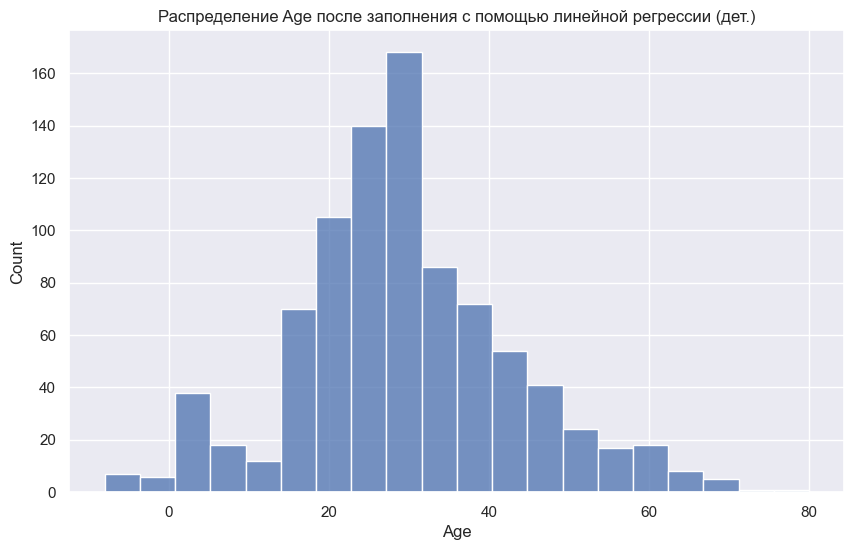

In [266]:
sns.histplot(lr['Age'],bins = 20)
plt.title('Распределение Age после заполнения с помощью линейной регрессии (дет.)')

In [267]:
# установим минимальное значение на уровне 0,5 (полгода)
lr.Age.clip(lower = 0.5, inplace = True)

C:\Users\Alex\AppData\Local\Temp\ipykernel_10760\378204803.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lr.Age.clip(lower = 0.5, inplace = True)


In [268]:
lr.Age.mean().round(1), lr.Age.median()

(29.3, 28.3)

In [269]:
#Особенность детерминированного подхода

In [270]:
# сделаем копию датафрейма, которую используем для визуализации
lr_viz = lr.copy()
 
# создадим столбец Age_type, в который запишем actual, если индекс наблюдения есть в train,
# и imputed, если нет (т.е. он есть в test)
lr_viz['Age_type'] = np.where(lr.index.isin(train.index), 'actual', 'imputed')
 
# вновь "обрежем" нулевые значения
lr_viz.Age.clip(lower = 0.5, inplace = True)
 
# посмотрим на результат
lr_viz.head(7)

C:\Users\Alex\AppData\Local\Temp\ipykernel_10760\2595860621.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lr_viz.Age.clip(lower = 0.5, inplace = True)


,Pclass,Sex,Age,SibSp,Parch,Fare,Age_type
0,3.0,0.0,22.0,1.0,0.0,7.2500,actual
1,1.0,1.0,38.0,1.0,0.0,71.2833,actual
2,3.0,1.0,26.0,0.0,0.0,7.9250,actual
3,1.0,1.0,35.0,1.0,0.0,53.1000,actual
4,3.0,0.0,35.0,0.0,0.0,8.0500,actual
5,3.0,0.0,28.3,0.0,0.0,8.4583,imputed
6,1.0,0.0,54.0,0.0,0.0,51.8625,actual


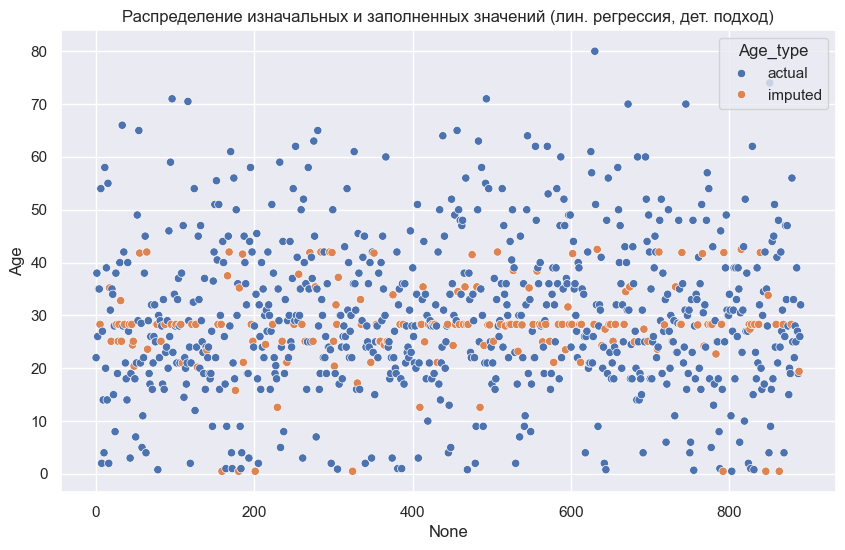

In [271]:
sns.scatterplot(data = lr_viz, x = lr_viz.index, y = 'Age', hue = 'Age_type')
plt.title('Распределение изначальных и заполненных значений (лин. регрессия, дет. подход)');


In [272]:
lr_viz[lr_viz['Age_type'] == 'actual'].Age.std().round(2), \
lr_viz[lr_viz['Age_type'] == 'imputed'].Age.std().round(2)

(14.53, 8.33)

In [273]:
#Стохастический подход

In [274]:
# объявим функцию для создания гауссовского шума
# на входе эта функция будет принимать некоторый массив значений x,
# среднее значение mu, СКО std и точку отсчета для воспроизводимости результата
def gaussian_noise(x, mu = 0, std = 1, random_state = 42):
 
  # вначале создадим объект, который позволит получать воспроизводимые результаты
  rs = np.random.RandomState(random_state)
 
  # применим метод .normal() к этому объекту для создания гауссовского шума
  noise = rs.normal(mu, std, size = x.shape)
 
  # добавим шум к исходному массиву
  return x + noise

In [275]:
test['Age'] = gaussian_noise(x = test['Age'])
 
# посмотрим, как изменились заполненные значения
test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare
5,0.827377,-0.737695,0.399313,-0.474545,-0.473674,-0.478116
17,-0.369365,-0.737695,0.241728,-0.474545,-0.473674,-0.386671
19,0.827377,1.355574,0.328434,-0.474545,-0.473674,-0.502949


In [276]:
# соединим датасеты и обновим индекс
lr_stochastic = pd.concat([train, test])
lr_stochastic.sort_index(inplace = True)
 
# вернем исходный масштаб с помощью метода .inverse_transform()
lr_stochastic = pd.DataFrame(scaler.inverse_transform(lr_stochastic), columns = lr_stochastic.columns)
 
# округлим столбец Age и выведем результат
lr_stochastic.Age = lr_stochastic.Age.round(1)
lr_stochastic.head(7)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,0.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,3.0,0.0,35.0,0.0,0.0,8.0500
5,3.0,0.0,35.5,0.0,0.0,8.4583
6,1.0,0.0,54.0,0.0,0.0,51.8625


Text(0.5, 1.0, 'Распределение Age после заполнения с помощью линейной регрессии (стох.)')

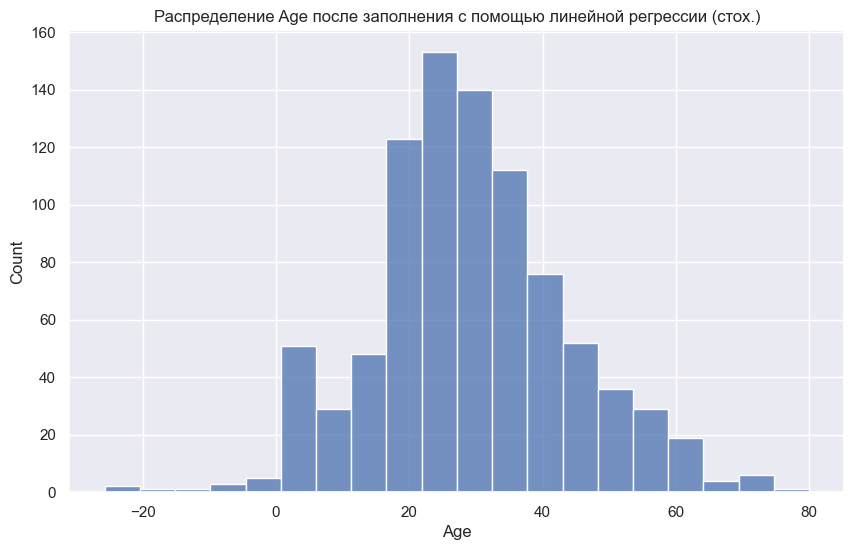

In [277]:
# посмотрим на распределение возраста
# после заполнения пропусков с помощью стохастического подхода
sns.histplot(lr_stochastic['Age'], bins = 20)
plt.title('Распределение Age после заполнения с помощью линейной регрессии (стох.)')

In [278]:
# обрежем нулевые и отрицательные значения
lr_stochastic.Age.clip(lower = 0.5, inplace = True)

C:\Users\Alex\AppData\Local\Temp\ipykernel_10760\3082660869.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lr_stochastic.Age.clip(lower = 0.5, inplace = True)


In [279]:
lr_stochastic.Age.mean().round(1), lr_stochastic.Age.median()

(29.3, 28.0)

C:\Users\Alex\AppData\Local\Temp\ipykernel_10760\1592245017.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lr_st_viz.Age.clip(lower = 0.5, inplace = True)


Text(0.5, 1.0, 'Распределение изначальных и заполненных значений (лин. регрессия, стох. подход)')

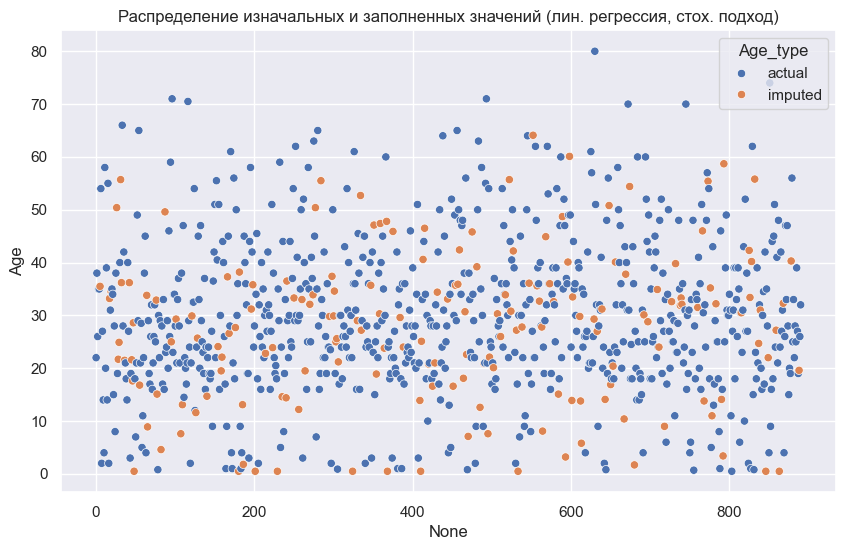

In [280]:
# сделаем копию датафрейма, которую используем для визуализации
lr_st_viz = lr_stochastic.copy()
 
# создадим столбец Age_type, в который запишем actual, если индекс наблюдения есть в train,
# и imputed, если нет (т.е. он есть в test)
lr_st_viz['Age_type'] = np.where(lr_stochastic.index.isin(train.index), 'actual', 'imputed')
 
# вновь "обрежем" нулевые значения
lr_st_viz.Age.clip(lower = 0.5, inplace = True)
 
# создадим график, где по оси x будет индекс датафрейма, 
# по оси y - возраст, а цветом мы обозначим изначальное это значение, или заполненное
sns.scatterplot(data = lr_st_viz, x = lr_st_viz.index, y = 'Age', hue = 'Age_type')
plt.title('Распределение изначальных и заполненных значений (лин. регрессия, стох. подход)')

In [281]:
lr_st_viz[lr_st_viz['Age_type'] == 'actual'].Age.std().round(2), \
lr_st_viz[lr_st_viz['Age_type'] == 'imputed'].Age.std().round(2)

(14.53, 14.34)

In [282]:
#MICE / IterativeImputer
#Описанный выше алгоритм регрессии используется в алгоритме MICE или IterativeImputer. MICE расшифровывается как Multiple Imputation by Chained Equations, многомерный способ заполнения пропущенных данных с помощью цепных уравнений.

In [283]:
#Принцип алгоритма MICE

In [284]:
#Реализация на Питоне через класс IterativeImputer

In [285]:
# сделаем копию датасета для работы с методом MICE
tit = titanic.drop(columns=['PassengerId','Survived','Name','Ticket','Cabin','Embarked'], axis = 1)
tit['Sex'] = tit['Sex'].replace({'male': 0, 'female':1})
mice = tit.copy()

KeyError: "['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'] not found in axis"

In [286]:
mice.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,0.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,3.0,0.0,35.0,0.0,0.0,8.0500


In [287]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [288]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [289]:
scaler = StandardScaler()
mice = pd.DataFrame(scaler.fit_transform(mice),columns=mice.columns)

In [290]:
# создадим объект класса IterativeImputer и укажем необходимые параметры
mice_imputer = IterativeImputer(initial_strategy = 'mean', # вначале заполним пропуски средним значением
                                estimator = LinearRegression(), # в качестве модели используем линейную регрессию
                                random_state = 42 # добавим точку отсчета
                                )
 
# используем метод .fit_transform() для заполнения пропусков в датасете mice
mice = mice_imputer.fit_transform(mice)
 
# вернем данные к исходному масштабу и округлим столбец Age
mice = pd.DataFrame(scaler.inverse_transform(mice), columns = tit.columns)
mice.Age = mice.Age.round(1)
mice.head(7)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,0.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,3.0,0.0,35.0,0.0,0.0,8.0500
5,3.0,0.0,28.3,0.0,0.0,8.4583
6,1.0,0.0,54.0,0.0,0.0,51.8625


In [291]:
mice.Age.isna().sum(), mice.shape

(0, (891, 6))

Text(0.5, 1.0, 'Распределение Age после заполнения с помощью MICE')

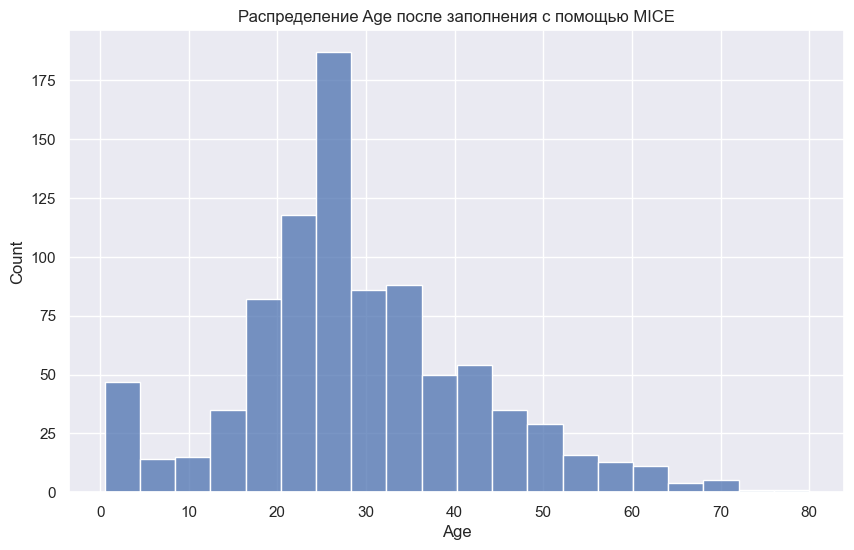

In [292]:
sns.histplot(mice['Age'],bins=20)
plt.title('Распределение Age после заполнения с помощью MICE')

In [293]:
mice.Age.clip(lower=0.5,inplace = True)

C:\Users\Alex\AppData\Local\Temp\ipykernel_10760\1466992311.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mice.Age.clip(lower=0.5,inplace = True)


In [294]:
mice.Age.mean().round(1), mice.Age.median()

(29.3, 28.3)

In [295]:
tit.Age.std().round(),mice.Age.std().round(2)

(15.0, 13.54)

In [296]:
# Метод k-ближайших соседей

In [297]:
#Sklearn KNNImputer

In [298]:
knn = tit.copy()

In [299]:
scaler = StandardScaler()
# масштабируем данные и сразу преобразуем их обратно в датафрейм
knn = pd.DataFrame(scaler.fit_transform(tit),columns=knn.columns)

In [300]:
#импортируем класс KNNImputer
from sklearn.impute import KNNImputer

#создадим объект класса с параметрами
#пять соседей и одинаковым весом каждого из них
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')
#заполним пропуски в столбце Age
knn = pd.DataFrame(knn_imputer.fit_transform(knn),columns=knn.columns)
# проверим отсутствие пропусков и размеры получившегося датафрейма
knn.Age.isna().sum(),knn.shape

(0, (891, 6))

In [301]:
#вернем исходный масштаб данных

In [302]:
knn = pd.DataFrame(scaler.inverse_transform(knn),columns=knn.columns)
#округлим значения возраста
knn.Age = knn.Age.round(1)

In [303]:
knn.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,0.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,3.0,0.0,35.0,0.0,0.0,8.0500


Text(0.5, 1.0, 'Распределение Age после заполнения с помощью KNNImputer')

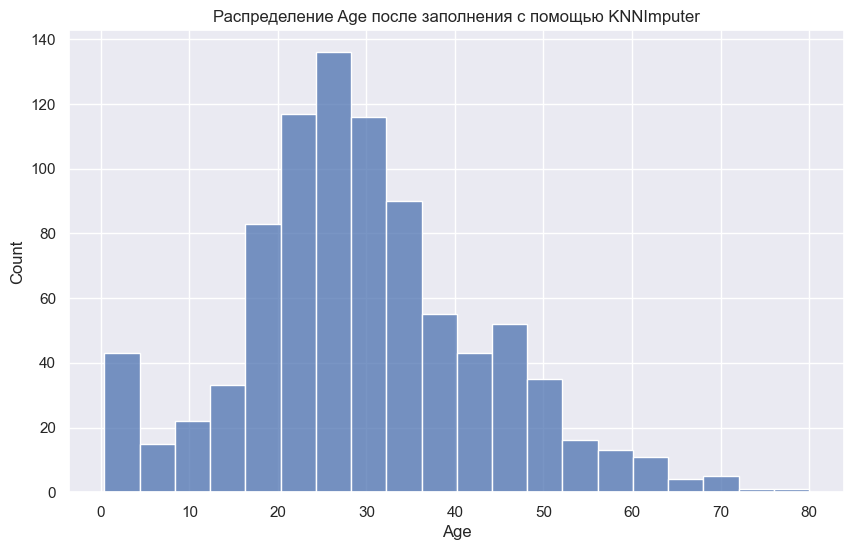

In [304]:
sns.histplot(knn['Age'],bins = 20)
plt.title('Распределение Age после заполнения с помощью KNNImputer')

In [305]:
#impyute fast_knn

In [306]:
#Функция fast_knn()

In [ ]:
!pip install impyute

In [ ]:
#Теперь воспользуемся фунцией fast_knn() для заполнения пропусков.

In [ ]:
# сделаем копию датафрейма и масштабируем данные
impyute = tit.copy()
scaler = StandardScaler()
impyute = scaler.fit_transform(impyute)
 
# на выходе в переменной impyute содержится массив Numpy
type(impyute)

numpy.ndarray

In [ ]:
tit.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [ ]:
# импортируем функцию fast_knn
from impyute.imputation.cs import fast_knn
 
# передаем этой функции массив Numpy и количество соседей
# (если данные содержатся в формате датафрейма, нужно использовать атрибут .values)
impyute = fast_knn(impyute, k = 5)
 
# возвращаем исходный масштаб и преобразуем в датафрейм
impyute = pd.DataFrame(scaler.inverse_transform(impyute), columns = tit.columns)
 
# округляем столбец возраста
impyute.Age = impyute.Age.round(1)
 
# проверим отсутствие пропусков и размеры получившегося датафрейма
impyute.Age.isna().sum(), impyute.shape

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
impyute.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
sns.histplot(impyute['Age'], bins = 20)
plt.title('Распределение Age после заполнения с помощью fast_knn()');

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
#DataWig

In [ ]:
#Сравнение методов

In [317]:
datasets = [const_imputer,median_imputer,lr, lr_stochastic, mice, knn]
methods = ['constant', 'median', 'linear regression', 'stochastic linear regression', 'MICE']


In [324]:
y = tit

In [325]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [326]:
# в цикле пройдемся по датасетам с заполненными пропусками
# и списком названий соответствующих методов
for X, method in zip(datasets, methods):
 
  # масштабируем признаки
  X = StandardScaler().fit_transform(X)
 
  # для каждого датасета построим и обучим модель логистической регрессии
  model = LogisticRegression()
  model.fit(X, y)
 
  # сделаем прогноз
  y_pred = model.predict(X)
 
  # выведем название использованного метода и достигнутую точность
  print(f'Method: {method}, accuracy: {np.round(accuracy_score(y, y_pred), 3)}')

a:\anaconda3\envs\clust_env\Lib\site-packages\sklearn\utils\extmath.py:1108: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
a:\anaconda3\envs\clust_env\Lib\site-packages\sklearn\utils\extmath.py:1113: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
a:\anaconda3\envs\clust_env\Lib\site-packages\sklearn\utils\extmath.py:1133: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values